<a href="https://colab.research.google.com/github/koech-Alex/Grid-Pathfinding-with-Diagonal-Movement-Using-GBFS-and-Visualization/blob/main/diagonal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

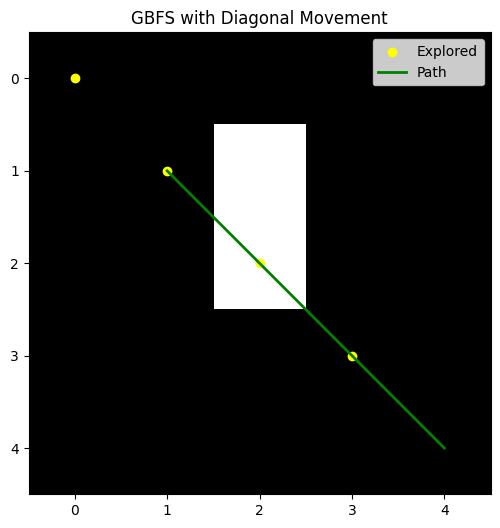

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def gbfs(grid, start, goal):
    """
    Implements GBFS for grid pathfinding with diagonal movement.

    Args:
        grid: A 2D grid representing the environment.
        start: The starting coordinates.
        goal: The goal coordinates.

    Returns:
        A list of explored nodes and the final path.
    """

    # Create a graph to represent the grid
    G = nx.Graph()

    # Add nodes and edges to the graph
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == 0:  # Ignore obstacles
                G.add_node((i, j))
                if i > 0:
                    G.add_edge((i, j), (i - 1, j), weight=1)
                if i < len(grid) - 1:
                    G.add_edge((i, j), (i + 1, j), weight=1)
                if j > 0:
                    G.add_edge((i, j), (i, j - 1), weight=1)
                if j < len(grid[0]) - 1:
                    G.add_edge((i, j), (i, j + 1), weight=1)
                if i > 0 and j > 0:
                    G.add_edge((i, j), (i - 1, j - 1), weight=1.414)  # Diagonal move
                if i < len(grid) - 1 and j > 0:
                    G.add_edge((i, j), (i + 1, j - 1), weight=1.414)
                if i > 0 and j < len(grid[0]) - 1:
                    G.add_edge((i, j), (i - 1, j + 1), weight=1.414)
                if i < len(grid) - 1 and j < len(grid[0]) - 1:
                    G.add_edge((i, j), (i + 1, j + 1), weight=1.414)

    # Define the heuristic function (Euclidean distance)
    def heuristic(node):
        return np.sqrt((node[0] - goal[0])**2 + (node[1] - goal[1])**2)

    # GBFS algorithm
    open_set = [(heuristic(start), start)]
    closed_set = set()
    parent = {}
    while open_set:
        current = open_set.pop(0)[1]
        if current == goal:
            path = []
            while current in parent:
                path.append(current)
                current = parent[current]
            path.reverse()
            return closed_set, path
        closed_set.add(current)
        for neighbor in G.neighbors(current):
            if neighbor not in closed_set:
                new_cost = heuristic(neighbor)
                if (new_cost, neighbor) not in open_set:
                    open_set.append((new_cost, neighbor))
                    parent[neighbor] = current
                    open_set.sort()  # Sort by heuristic

    return None, None

# Example usage
grid = [[0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]
start = (0, 0)
goal = (4, 4)

explored, path = gbfs(grid, start, goal)

# Visualization
plt.figure(figsize=(6, 6))
plt.imshow(grid, cmap='gray', interpolation='nearest')
plt.scatter(*zip(*explored), color='yellow', label='Explored')
plt.plot(*zip(*path), color='green', linewidth=2, label='Path')
plt.title('GBFS with Diagonal Movement')
plt.legend()
plt.show()